In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 44

In [ ]:
import numpy as np
from dezero import Variable as v
import dezero.functions as F
import dezero.layers as L

# data set
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)   # 출력 크기 지정
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


# Step 45

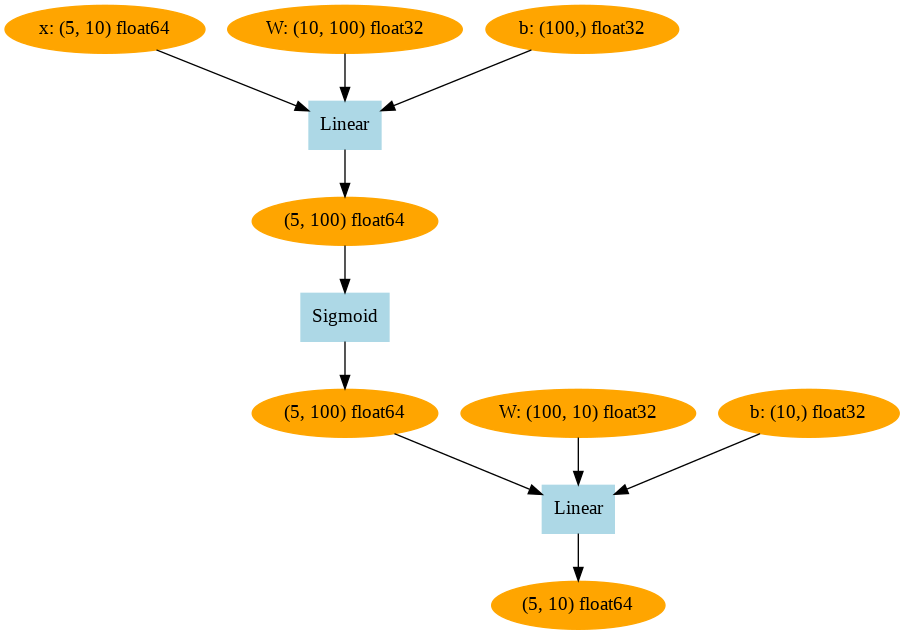

In [ ]:
import numpy as np
from dezero import Variable as v
from dezero import Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = self.l1(x)
        y = F.sigmoid(y)
        y = self.l2(y)
        return y

x = v(np.random.randn(5, 10), name='x')
model = TwoLayerNet(100, 10)
model.plot(x, to_file='TwoLayerNet')

In [ ]:
# data set
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# hyper param
lr = 0.2
max_iter = 10000
hidden_size = 10

# define model
model = TwoLayerNet(hidden_size, 1)

# train
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


# Step 46

In [ ]:
import numpy as np
from dezero import Variable as v
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

loss_SGD = []
loss_MomentumSGD = []

# data set
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# hyper param
lr = 0.2
max_iter = 10000
hidden_size = 10

# define model
model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

# train
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    # for p in model.params():
    #     p.data -= lr * p.grad.data
    optimizer.update()

    if i % 1000 == 0:
        loss_SGD.append(loss.data)

In [ ]:
# data set
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# hyper param
lr = 0.2
max_iter = 10000
hidden_size = 10

# define model
model = MLP((hidden_size, 1))
optimizer = optimizers.MomentumSGD(lr)
optimizer.setup(model)

# train
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    # for p in model.params():
    #     p.data -= lr * p.grad.data
    optimizer.update()
    
    if i % 1000 == 0:
        loss_MomentumSGD.append(loss.data)

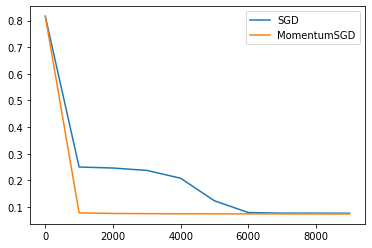

In [ ]:
import matplotlib.pyplot as plt

i = [1000*i for i in range(0, 10)]

plt.plot(i, loss_SGD, label='SGD')
plt.plot(i, loss_MomentumSGD, label='MomentumSGD')

plt.legend()
plt.show()

# Step 47

Index slicing function

In [2]:
import numpy as np
from dezero import Variable as v
import dezero.functions as F

x = v(np.array([[1,2,3],[4,5,6]]))
y = F.get_item(x, 1)
print(y)

y.backward()
print(x.grad)

variable([4 5 6])
variable([[0. 0. 0.]
          [1. 1. 1.]])


In [3]:
# get_item 함수를 Variable의 메서드로 사용가능하다.
y = x[1]
print(y)

y = x[:, 2]
print(y)

variable([4 5 6])
variable([3 6])


softmax func

In [4]:
from dezero.models import MLP
model = MLP((10, 3))

x = np.array([[0.2, -0.4]])
y = model(x)
print(y)

variable([[-0.01054869 -0.37157383 -0.90535001]])


In [5]:
from dezero import Variable as v
from dezero import as_variable
import dezero.functions as F

def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y

x = v(np.array([[0.2, -0.4]]))
y = model(x)
p = softmax1d(y)
print(y)
print(p)

variable([[-0.01054869 -0.37157383 -0.90535001]])
variable([[0.47491267 0.33099584 0.19409149]])


dezero의 softmax함수를 이용하자

In [6]:
x = v(np.array([[0.2, -0.4]]))
y = model(x)
p = F.softmax(y)
print(y)
print(p)

variable([[-0.01054869 -0.37157383 -0.90535001]])
variable([[0.47491267 0.33099584 0.19409149]])


cross entropy loss

In [8]:
x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])
y = model(x)
loss = F.softmax_cross_entropy(y, t)
print(loss)

variable([[-0.01054869 -0.37157383 -0.90535001]
          [ 0.10909977 -0.38627974 -0.86244965]
          [-0.01463463 -0.41934886 -1.36505569]
          [ 0.17292991 -0.47304615 -1.20432563]])
variable(0.9903467852611565)
